In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
reviews=pd.read_csv("reviews.csv")
listing=pd.read_csv("listings.csv")

In [32]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,319887,11019466,2014-03-17,1342637,Louis,"Great house to stay in Austin. Its clean, comf..."
2,319887,28127764,2015-03-18,705404,Matt,This was a perfect crash pad for SXSW week. It...
3,46856014,716545198,2020-12-19,64832066,Ryan,Really enjoyed staying at this place. So quiet...
4,46856014,719745409,2020-12-30,59487866,Becky,Great location. Beautiful property. Niza is an...


In [33]:
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220912200151,2022-09-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.73
1,5769,https://www.airbnb.com/rooms/5769,20220912200151,2022-09-13,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.75,4.92,NaN,f,1,0,1,0,1.78
2,46856014,https://www.airbnb.com/rooms/46856014,20220912200151,2022-09-12,city scrape,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",Quiet evenings with a beautiful view of the la...,"Starbucks, Shopping center, Grocery Store, Dol...",https://a0.muscache.com/pictures/13ec989b-f3b6...,375760981,...,4.97,4.83,4.77,NaN,t,1,1,0,0,4.17
3,319887,https://www.airbnb.com/rooms/319887,20220912200151,2022-09-13,previous scrape,Quaint East Austin 2BR SXSW 2016,Awesome house in the middle of downtown action...,The neighborhood is the first sub-division in ...,https://a0.muscache.com/pictures/31764696/dbae...,1640158,...,5.00,4.00,4.00,NaN,f,1,1,0,0,0.02
4,319894,https://www.airbnb.com/rooms/319894,20220912200151,2022-09-13,city scrape,The Perfect Austin Modern Home,The home is a 2300 square foot modern style 3 ...,Everyone who lives in Agave - LOVES Agave. It'...,https://a0.muscache.com/pictures/200398af-d3b2...,1640172,...,4.98,4.82,4.88,NaN,f,2,1,1,0,1.34


In [34]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [35]:
listing=listing[["id","name","host_id","host_name",'neighbourhood',"room_type",'property_type',"minimum_nights","maximum_nights",'availability_365','number_of_reviews_l30d','review_scores_rating','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','price', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','availability_90']]

In [36]:
listing['price']=listing['price'].astype("str").str.replace("$","")
listing['price']=listing['price'].astype('str').str.replace(',','')
listing['price']=listing['price'].astype('float')

C:\Users\nilch\AppData\Local\Temp\ipykernel_5840\622587329.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['price']=listing['price'].astype("str").str.replace("$","")


In [37]:
listing.head()

,id,name,host_id,host_name,neighbourhood,room_type,property_type,minimum_nights,maximum_nights,availability_365,...,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_90
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,"Austin, Texas, United States",Entire home/apt,Entire guesthouse,2,90,311,...,3.73,1,140.0,4.87,4.85,4.89,4.81,4.74,4.79,46
1,5769,NW Austin Room,8186,Elizabeth,"Austin, Texas, United States",Private room,Private room in home,1,14,3,...,1.78,1,41.0,4.90,4.86,4.91,4.94,4.75,4.92,3
2,46856014,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,"Burnet, Texas, United States",Entire home/apt,Entire home,2,2,342,...,4.17,1,194.0,4.84,4.80,4.93,4.97,4.83,4.77,72
3,319887,Quaint East Austin 2BR SXSW 2016,1640158,Jeremy,"Austin, Texas, United States",Entire home/apt,Entire home,4,11,0,...,0.02,1,694.0,4.50,3.50,4.50,5.00,4.00,4.00,0
4,319894,The Perfect Austin Modern Home,1640172,Gary,"Austin, Texas, United States",Entire home/apt,Entire home,2,60,156,...,1.34,2,192.0,4.90,4.73,4.98,4.98,4.82,4.88,66


In [38]:
listing.dropna(inplace=True)

In [40]:
listing.to_csv("listing_austin.csv")

In [12]:
listing.last_review=pd.to_datetime(listing.last_review)

In [13]:
max(listing.last_review)

Timestamp('2022-09-12 00:00:00')

In [14]:
min(listing.last_review)

Timestamp('2012-03-13 00:00:00')

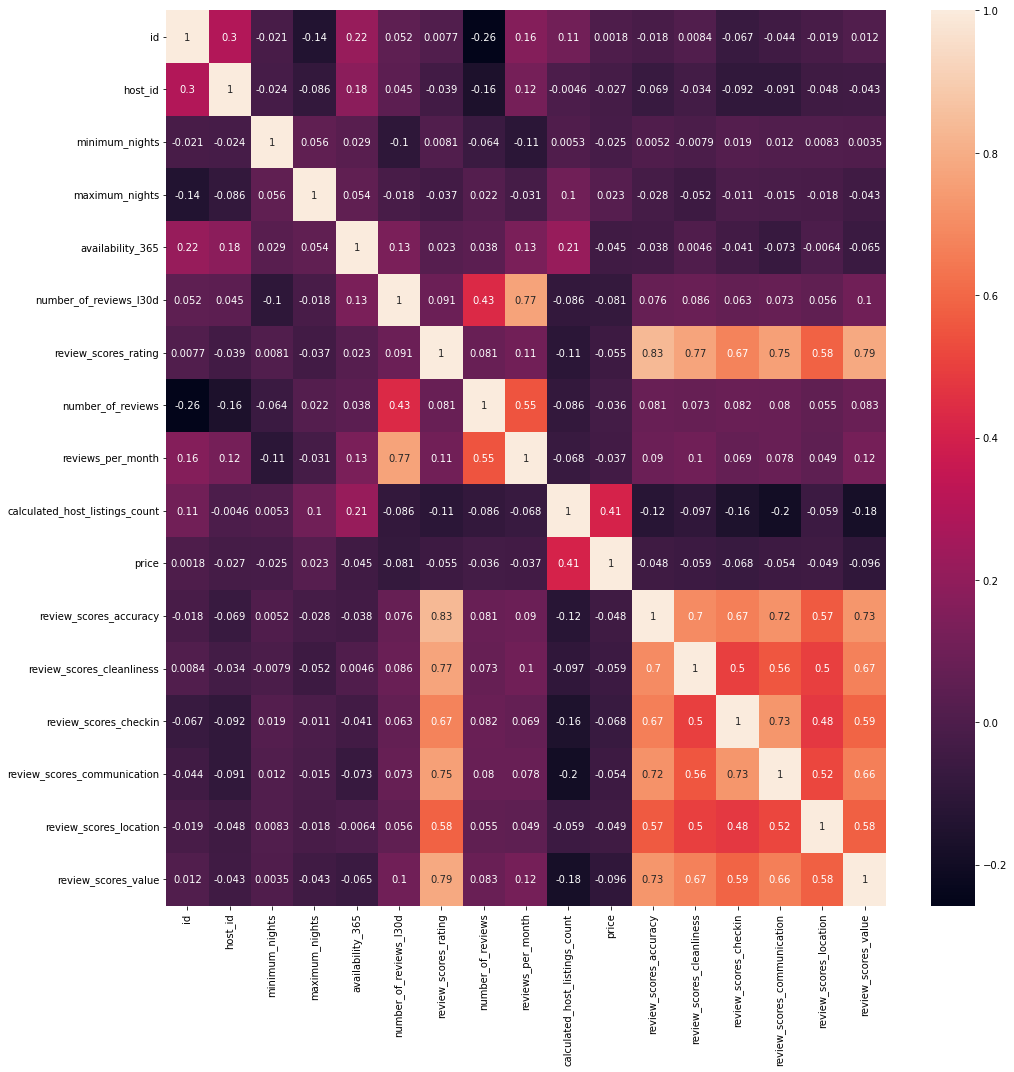

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(listing.corr(),annot=True)
plt.tight_layout()

In [16]:
listing['month_year'] = listing['last_review'].dt.to_period('M')

In [18]:
listing_covid=listing[(listing.month_year>"2020-03") & (listing.month_year<="2020-12")]

In [19]:
listing_noncovid=listing[(listing.month_year>"2020-12") & (listing.month_year<="2021-09")]

In [21]:
listing_covid.groupby('room_type').mean()

,id,host_id,minimum_nights,maximum_nights,availability_365,number_of_reviews_l30d,review_scores_rating,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
room_type,,,,,,,,,,,,,,,,,
Entire home/apt,2.710373e+07,8.176818e+07,11.959302,658.151163,124.313953,0.0,4.750523,27.034884,0.443372,17.470930,449.895349,4.797907,4.788605,4.805291,4.813081,4.830465,4.625988
Hotel room,3.845068e+07,5.919556e+07,1.000000,1125.000000,245.000000,0.0,5.000000,1.500000,0.050000,13.000000,282.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Private room,3.309529e+07,1.376064e+08,10.172414,554.655172,68.551724,0.0,4.659655,15.344828,0.281724,3.827586,448.862069,4.740345,4.698621,4.739655,4.747931,4.736552,4.667931
Shared room,2.219422e+07,8.167447e+06,30.000000,1125.000000,255.333333,0.0,4.610000,8.000000,0.150000,78.000000,22.333333,4.776667,4.000000,4.806667,4.500000,4.776667,4.583333


In [22]:
listing_noncovid.groupby('room_type').mean()

,id,host_id,minimum_nights,maximum_nights,availability_365,number_of_reviews_l30d,review_scores_rating,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
room_type,,,,,,,,,,,,,,,,,
Entire home/apt,3.473093e+07,1.224058e+08,11.755495,641.450549,139.304945,0.0,4.714725,16.651099,0.363571,16.791209,365.340659,4.736154,4.708187,4.822995,4.797610,4.838571,4.658516
Hotel room,3.675101e+07,6.031927e+07,1.333333,1104.166667,209.666667,0.0,4.761667,3.500000,0.123333,13.000000,409.000000,4.921667,4.810000,4.928333,4.881667,4.951667,4.460000
Private room,3.595817e+07,1.342116e+08,14.851064,637.276596,155.287234,0.0,4.709149,10.936170,0.259043,9.595745,99.595745,4.707979,4.615638,4.825745,4.765319,4.810426,4.668085
Shared room,2.516979e+07,1.670412e+07,28.352941,1059.058824,237.470588,0.0,4.517059,7.058824,0.130588,73.470588,22.941176,4.478235,4.182353,4.661765,4.654118,4.785882,4.641176


In [60]:
reviews_covid.shape

(21844, 6)

In [61]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in reviews_covid.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 


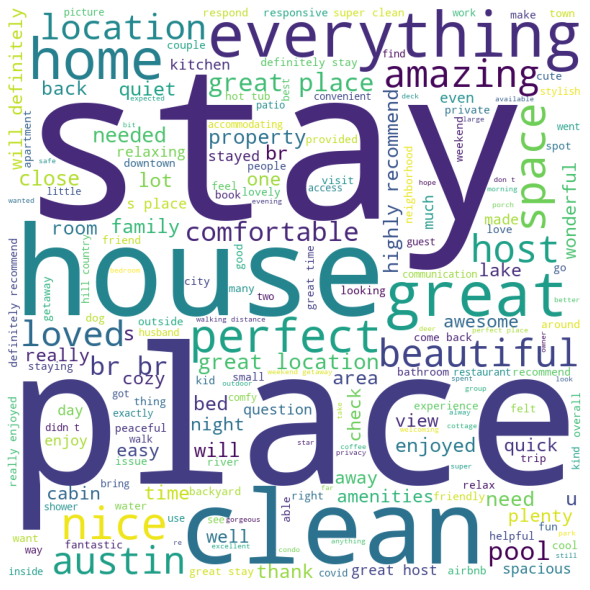

In [62]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [63]:
reviews_aftercovid=reviews[(reviews.date>='2021-04-30')& (reviews.date<='2021-07-31')]

In [64]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in reviews_aftercovid.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

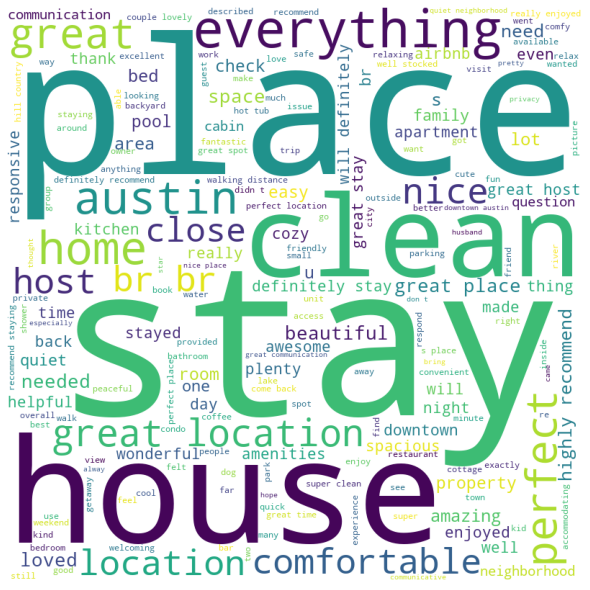

In [65]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()